In [2]:
import numpy as np
import scipy.special as sp
import numpy.testing as npt
import pymwm
from pymwm.cutoff import Cutoff

co = Cutoff(16, 8)

File Not Found.


2021-08-04 02:03:03,532	INFO services.py:1267 -- View the Ray dashboard at http://127.0.0.1:8265


In [3]:
co(('E',1,2),0.5)

6.564942308822793

(0.0, 100.0)

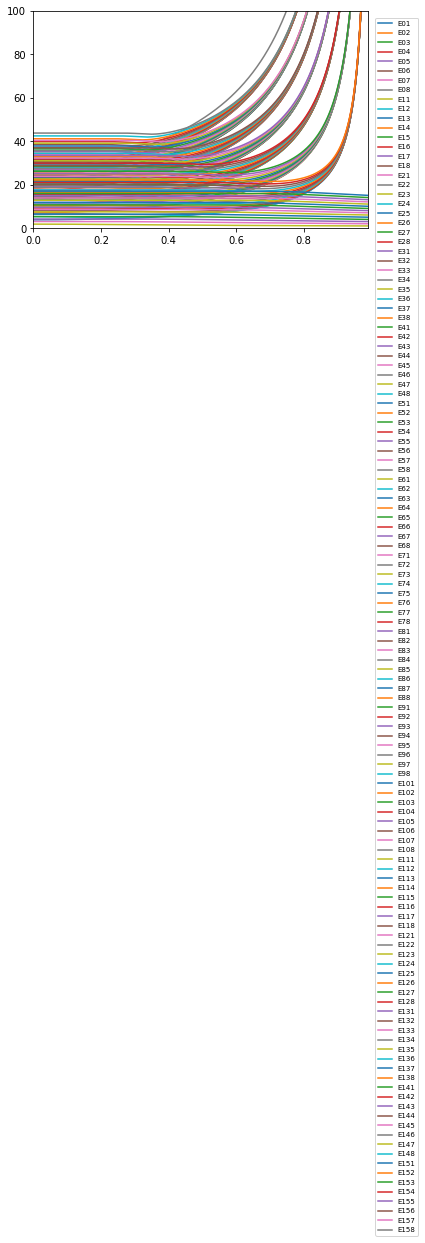

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

#samples = []
#for rr in range(100):
#    sample = co.samples[rr][('E', 1, 2)]
#    samples.append(sample)

# for n in range(3):
#     for m in range(3):
#         samples = [s[('E', n, m+1)] for s in co.samples]
#         plt.plot(co.r_ratios, samples, label=f"E{n}{m+1}")

for n in range(16):
    for m in range(8):
        df = co.samples.query(f"pol=='E' and n=={n} and m=={m+1}")
        plt.plot(df['rr'], df['val'], label=f"E{n}{m+1}")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0,0.99)
plt.ylim(0,100)

#0.99まで有効

In [29]:
df1 = co.samples.query(f"pol=='E' and  n == 0 and m == 1")
df2 = co.samples.query(f"pol=='E' and  n == 1 and m == 1")
display(df1)
display(df2)
display(df1['val'].to_numpy() - df2['val'].to_numpy())

,irr,m,n,pol,rr,val
0,0,1,0,E,0.000,3.831706
256,1,1,0,E,0.001,3.831718
512,2,1,0,E,0.002,3.831753
768,3,1,0,E,0.003,3.831812
1024,4,1,0,E,0.004,3.831895
...,...,...,...,...,...,...
254720,995,1,0,E,0.995,503.601540
254976,996,1,0,E,0.996,580.244345
255232,997,1,0,E,0.997,682.644643
255488,998,1,0,E,0.998,831.624215


,irr,m,n,pol,rr,val
8,0,1,1,E,0.000,1.841184
264,1,1,1,E,0.001,1.841180
520,2,1,1,E,0.002,1.841168
776,3,1,1,E,0.003,1.841149
1032,4,1,1,E,0.004,1.841122
...,...,...,...,...,...,...
254728,995,1,1,E,0.995,1.002507
254984,996,1,1,E,0.996,1.002005
255240,997,1,1,E,0.997,1.001503
255496,998,1,1,E,0.998,1.001001


array([   1.99052219,    1.99053781,    1.9905848 ,    1.99066312,
          1.99077273,    1.99091362,    1.99108575,    1.9912891 ,
          1.99152364,    1.99178931,    1.99208609,    1.99241392,
          1.99277276,    1.99316256,    1.99358327,    1.99403483,
          1.99451719,    1.99503029,    1.99557407,    1.99614847,
          1.99675342,    1.99738886,    1.99805473,    1.99875096,
          1.99947748,    2.00023422,    2.00102111,    2.00183808,
          2.00268506,    2.00356198,    2.00446876,    2.00540533,
          2.00637161,    2.00736753,    2.00839301,    2.00944797,
          2.01053235,    2.01164605,    2.01278901,    2.01396114,
          2.01516236,    2.0163926 ,    2.01765179,    2.01893982,
          2.02025664,    2.02160216,    2.02297629,    2.02437897,
          2.0258101 ,    2.02726961,    2.02875742,    2.03027344,
          2.0318176 ,    2.03338982,    2.03499001,    2.0366181 ,
          2.038274  ,    2.03995764,    2.04166893,    2.04340

(0.0, 0.1)

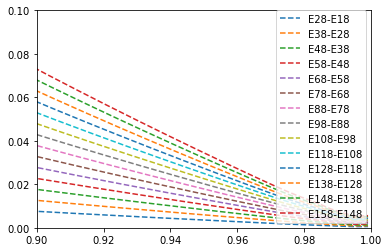

In [7]:
for m in range(7, 8):
    for n in range(1, 15):
        df1 = co.samples.query(f"pol=='E' and n=={n} and m=={m+1}")
        df2 = co.samples.query(f"pol=='E' and n=={n+1} and m=={m+1}")
        val_dif = df2['val'].to_numpy() - df1['val'].to_numpy()
        plt.plot(df1['rr'], val_dif, "--", label=f"E{n+1}{m+1}-E{n}{m+1}")
        
plt.legend()

plt.xlim(0.9,1)
plt.ylim(0,0.1)

(0.0, 100.0)

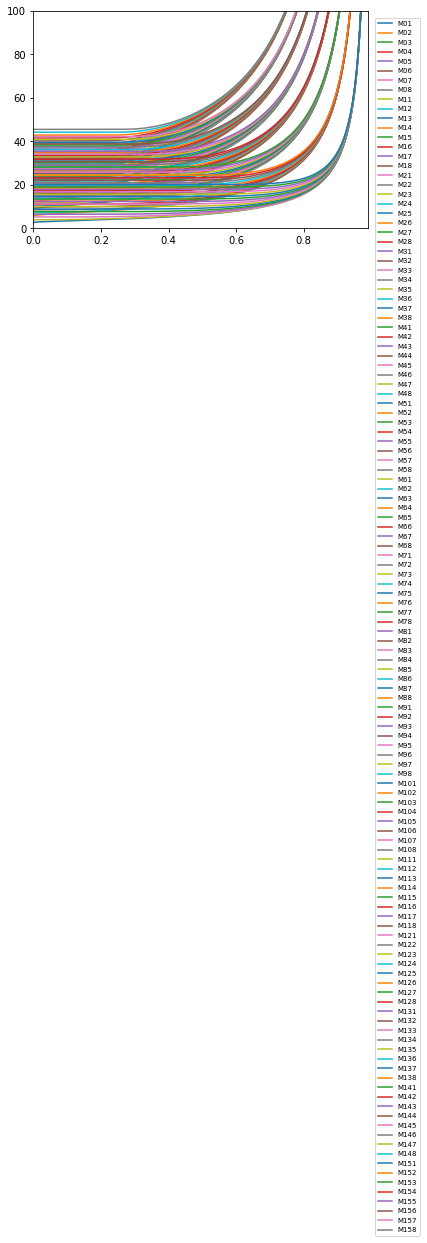

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

for n in range(16):
    for m in range(8):
        df = co.samples.query(f"pol=='M' and n=={n} and m=={m+1}")
        plt.plot(df['rr'], df['val'], label=f"M{n}{m+1}")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0,0.99)
plt.ylim(0,100)

#0.99まで有効

In [5]:
import pandas as pd
df = pd.DataFrame()
for i, (r_ratio, sample) in enumerate(zip(co.r_ratios, co.samples)):
    for pol in ['E', 'M']:
        for n in range(co.num_n):
            for m in range(1, co.num_m + 1):
                df = df.append({'irr': i, 'rr': r_ratio,
                                'pol': pol, 'n': n, 'm': m, 'val': sample[(pol, n, m)]},
                               ignore_index=True)
df = df.astype({'irr': int, 'n': int, 'm': int})
df.to_hdf("cutoff.h5", "cutoff")

TypeError: string indices must be integers

In [61]:
df = df.astype({'irr': int, 'n': int, 'm': int})

In [60]:
import pandas as pd
df=pd.read_hdf("cutoff.h5")
df.query(f"irr==1 and pol=='E' and n==1 and m==1")['val']*2

264    3.68236
Name: val, dtype: float64

In [16]:
df

""


nの差をグラフで
num_n num_m 大きめ(n16,m8)で試す